In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [6]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [7]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [9]:
train.shape

(31647, 18)

In [10]:
test.shape

(13564, 17)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [13]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
sns.set_palette('Set2')

Univariate Analysis

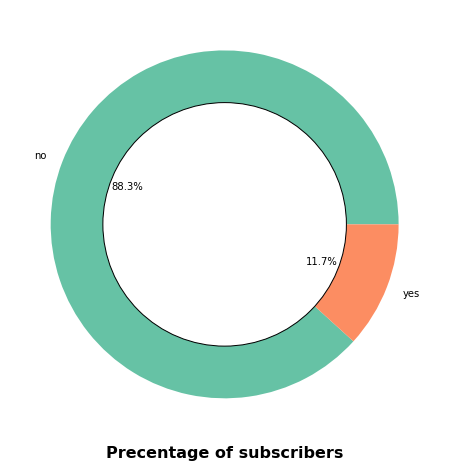

no     27932
yes     3715
Name: subscribed, dtype: int64

In [15]:
plt.figure(figsize=(10, 8))
train['subscribed'].value_counts().plot.pie(autopct='%3.1f%%')
centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Precentage of subscribers",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['subscribed'].value_counts()

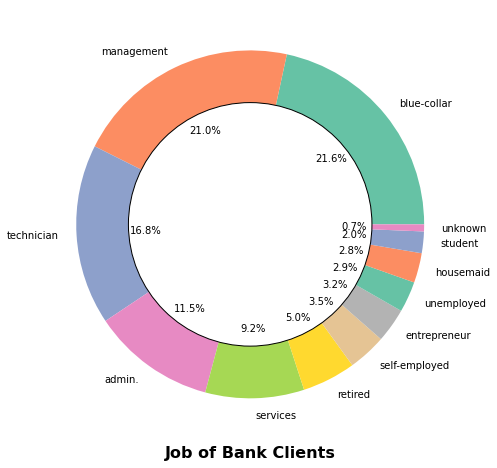

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [16]:
plt.figure(figsize=(10, 8))
train['job'].value_counts().plot.pie(autopct='%3.1f%%')

centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Job of Bank Clients",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['job'].value_counts()

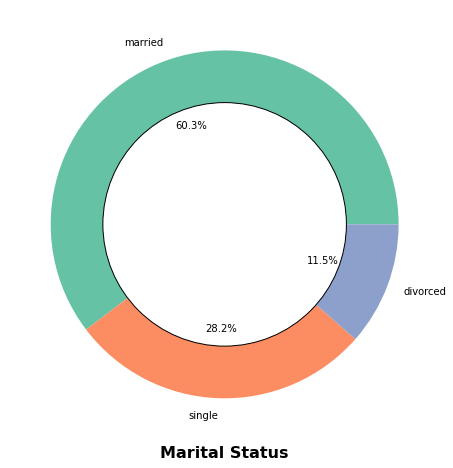

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [17]:
plt.figure(figsize=(10, 8))
train['marital'].value_counts().plot.pie(autopct='%3.1f%%')

centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Marital Status",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['marital'].value_counts()

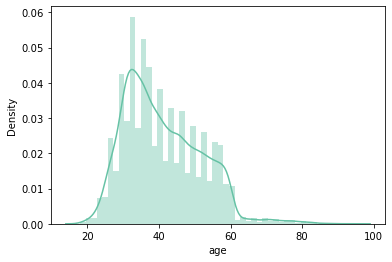

In [18]:
sns.distplot(train['age']);

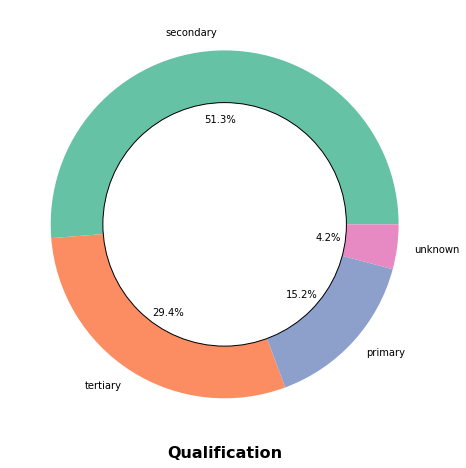

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [19]:
plt.figure(figsize=(10, 8))
train['education'].value_counts().plot.pie(autopct='%3.1f%%')

centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Qualification",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['education'].value_counts()

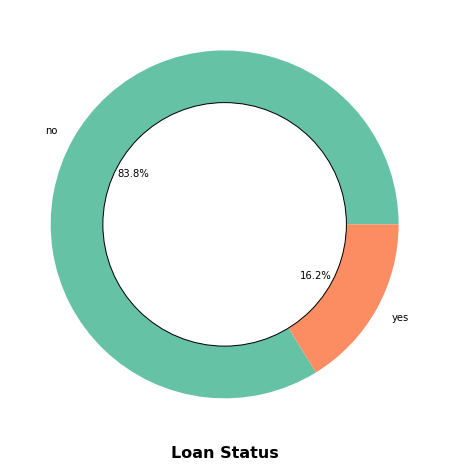

no     26516
yes     5131
Name: loan, dtype: int64

In [20]:
plt.figure(figsize=(10, 8))
train['loan'].value_counts().plot.pie(autopct='%3.1f%%')

centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Loan Status",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['loan'].value_counts()

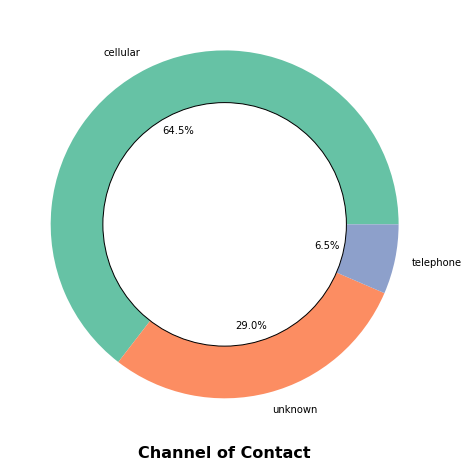

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [21]:
plt.figure(figsize=(10, 8))
train['contact'].value_counts().plot.pie(autopct='%3.1f%%')

centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Channel of Contact",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['contact'].value_counts()

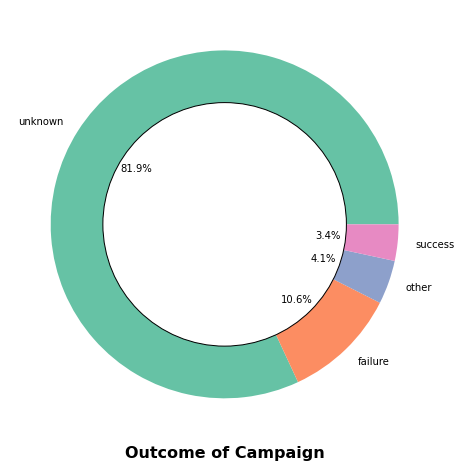

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [22]:
plt.figure(figsize=(10, 8))
train['poutcome'].value_counts().plot.pie(autopct='%3.1f%%')

centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Outcome of Campaign",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['poutcome'].value_counts()

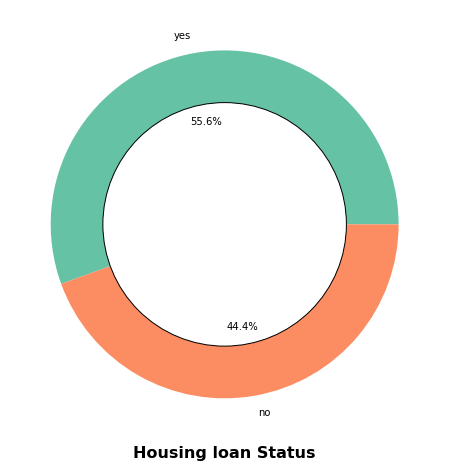

yes    17584
no     14063
Name: housing, dtype: int64

In [23]:
plt.figure(figsize=(10, 8))
train['housing'].value_counts().plot.pie(autopct='%3.1f%%')

centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Housing loan Status",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()
train['housing'].value_counts()

Bivariate Analysis

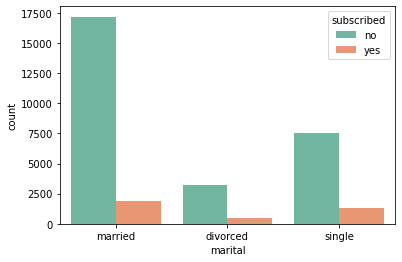

In [24]:
#Subscription according to marital status
sns.countplot(data=train, x='marital', hue='subscribed');

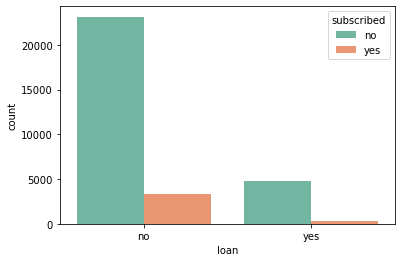

In [25]:
#subscription according to loan taken or not
sns.countplot(data=train, x='loan', hue='subscribed');

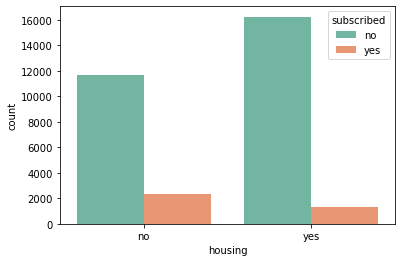

In [26]:
#Subsription According to housing loan taken or not
sns.countplot(data=train, x='housing', hue='subscribed');

housing     no    yes
loan                 
no       11993  14523
yes       2070   3061


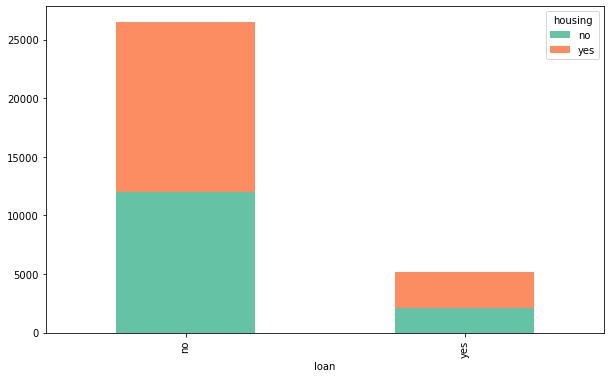

In [27]:
#Checking bifurcation of loans
Loan = pd.crosstab(train['loan'], train['housing'])
print(Loan)
Loan.plot.bar(stacked=True, figsize=(10,6));

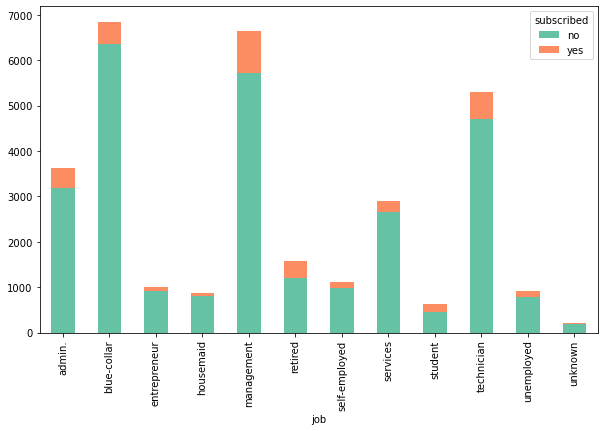

In [28]:
#Job and subsciption correlation
jobs = pd.crosstab(train['job'], train['subscribed'])
jobs.plot.bar(stacked=True, figsize=(10,6));

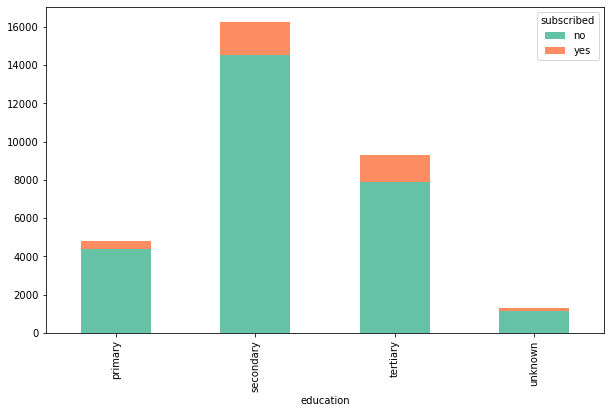

In [29]:
#Deposit and education Stats
jobs = pd.crosstab(train['education'], train['subscribed'])
jobs.plot.bar(stacked=True, figsize=(10,6));

In [30]:
#people having Deposit and loan
pd.crosstab([train['loan'],train['housing']], train['subscribed'])


subscribed       no   yes
loan housing             
no   no        9787  2206
     yes      13345  1178
yes  no        1911   159
     yes       2889   172

In [31]:
pd.crosstab(train['previous'], train['subscribed'])

subscribed,no,yes
previous,,
0,23553,2371
1,1499,422
2,1154,327
3,580,200
4,382,119
5,227,84
6,128,60
7,102,36
8,56,25


In [32]:
pd.crosstab(train['campaign'], train['subscribed'])#Result of different campaigns

subscribed,no,yes
campaign,,
1,10486,1776
2,7792,1006
3,3439,419
4,2213,229
5,1147,98
6,845,71
7,484,34
8,335,21
9,221,15


In [33]:
#Campaign Analysis

df = pd.DataFrame()
df['campaign_yes'] = (train[train['subscribed'] == 'yes'][['subscribed','campaign']].describe())['campaign']
df['campaign_no'] = (train[train['subscribed'] == 'no'][['subscribed','campaign']].describe())['campaign']

df

,campaign_yes,campaign_no
count,3715.000000,27932.000000
mean,2.162853,2.845876
std,1.952621,3.228593
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


subscribed    no  yes
month                
apr         1671  384
aug         3813  520
dec           85   72
feb         1522  305
jan          880   97
jul         4403  441
jun         3355  383
mar          168  174
may         9020  649
nov         2508  275
oct          288  224
sep          219  191


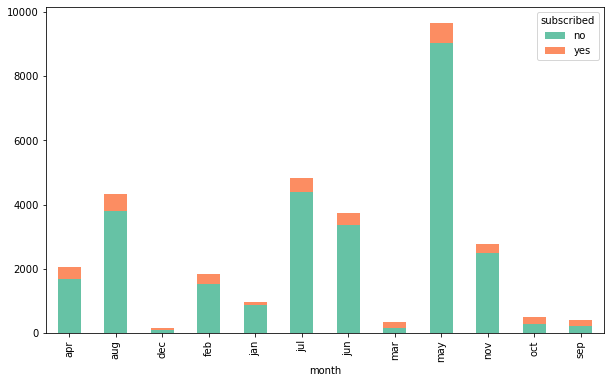

In [34]:
#Monthwise product sale analysis
month = pd.crosstab(train['month'], train['subscribed'])
month.plot.bar(stacked=True, figsize=(10,6));
print(month)

In [35]:
#Results of campaigns
pd.crosstab(train['campaign'], train['poutcome'])

poutcome,failure,other,success,unknown
campaign,,,,
1,1666,489,599,9508
2,952,359,278,7209
3,361,182,100,3215
4,159,99,38,2146
5,97,59,22,1067
6,65,43,15,793
7,34,25,8,451
8,15,14,7,320
9,6,9,1,220


In [36]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<AxesSubplot:>

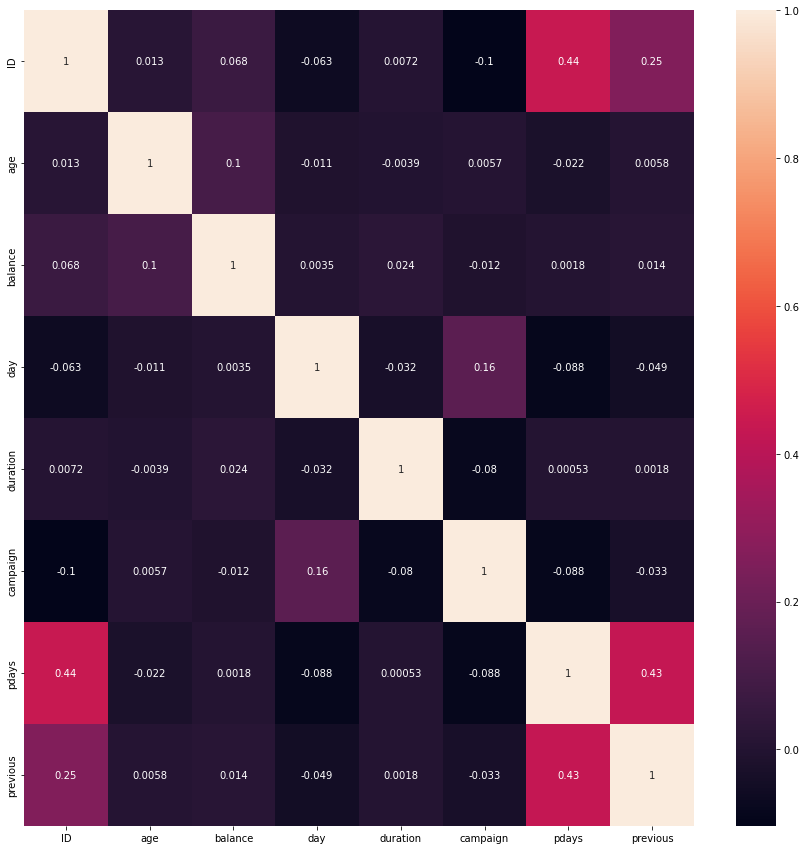

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True)

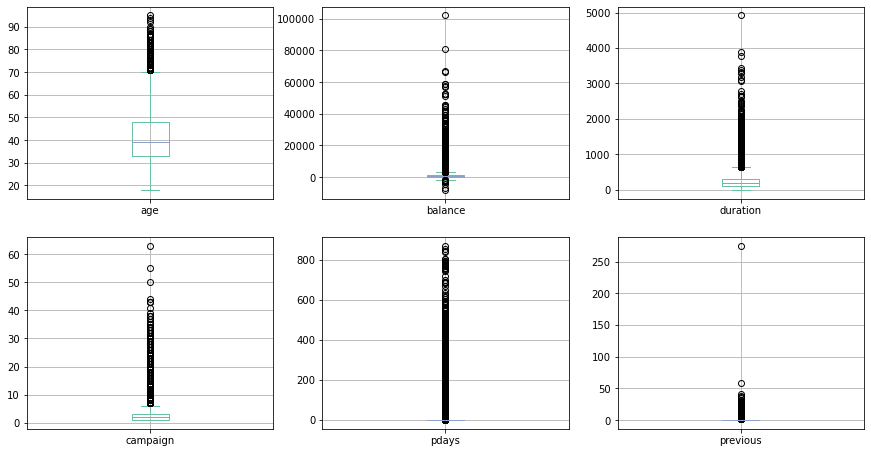

In [38]:
train[['age',
      'balance', 
      'duration',
      'campaign',
      'pdays', 
      'previous']].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,12), grid=True);

<AxesSubplot:>

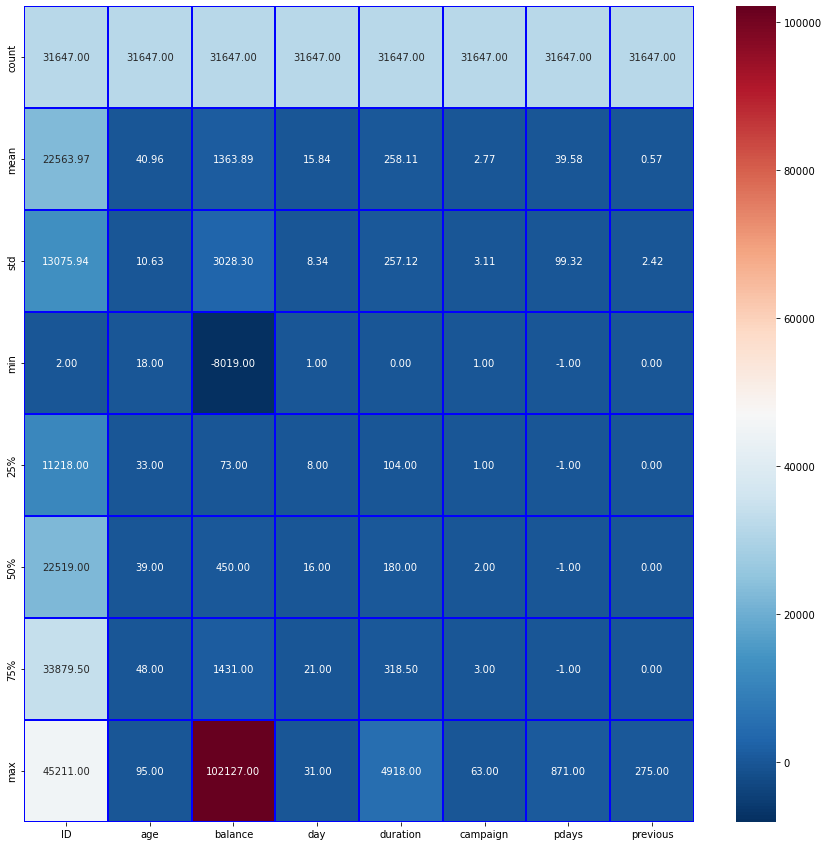

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(train.describe(), annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f",cmap = 'RdBu_r')

Model Building and preprocessing

In [40]:
# Converting the target variables into 0s and 1s
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
Y = train['subscribed']
train= train.drop('subscribed', axis=1)

In [43]:
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

for i in train.columns:
    if train[i].dtype=='object':
        train[i]=encode.fit_transform(train[i].values.reshape(-1,1))


In [45]:
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2,random_state=10)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [47]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd.fit(X_train, y_train)

Y_pred = sgd.predict(X_train)#training prediction
Y_pred1 = sgd.predict(X_test)#test prediction
acc_sgd=accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.8634119366433621
Accuracy Test:  0.8631911532385466


In [48]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

Y_pred = rfc.predict(X_train)#training prediction
Y_pred1 = rfc.predict(X_test)#test prediction
acc_random_forest=accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))


Accuracy Training:  1.0
Accuracy Test:  0.9121642969984203


In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

Y_pred = lr.predict(X_train)#training prediction
Y_pred1 = lr.predict(X_test)#test prediction
acc_log =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.8869929296520125
Accuracy Test:  0.891785150078989


In [50]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  

Y_pred = knn.predict(X_train)#training prediction
Y_pred1 = knn.predict(X_test)#test prediction
acc_knn =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.9405142789430028
Accuracy Test:  0.8962085308056872


In [51]:
gauss = GaussianNB() 
gauss.fit(X_train, y_train)  

Y_pred = gauss.predict(X_train)#training prediction
Y_pred1 = gauss.predict(X_test)#test prediction
acc_gaussian =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.8615159774064858
Accuracy Test:  0.8685624012638231


In [52]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_train)#training prediction
Y_pred1 = perceptron.predict(X_test)#test prediction
acc_perceptron =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.8484417585021922
Accuracy Test:  0.8552922590837283


In [53]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

Y_pred = lsvc.predict(X_train)#training prediction
Y_pred1 = lsvc.predict(X_test)#test prediction
acc_linear_svc =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  0.8832800094797962
Accuracy Test:  0.8826224328593997


In [54]:
dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train) 

Y_pred = dtree.predict(X_train)#training prediction
Y_pred1 = dtree.predict(X_test)#test prediction
acc_decision_tree =accuracy_score(y_train,Y_pred)
print("Accuracy Training: ",accuracy_score(y_train,Y_pred))
print("Accuracy Test: ",accuracy_score(y_test,Y_pred1))

Accuracy Training:  1.0
Accuracy Test:  0.8906793048973144


In [55]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc*100, acc_knn*100, acc_log*100, 
              acc_random_forest*100, acc_gaussian*100, acc_perceptron*100, 
              acc_sgd*100, acc_decision_tree*100]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.000000,Random Forest
100.000000,Decision Tree
94.051428,KNN
88.699293,Logistic Regression
88.328001,Support Vector Machines
86.341194,Stochastic Gradient Decent
86.151598,Naive Bayes
84.844176,Perceptron


In [56]:
param_grid = { "criterion" : ["gini", "entropy","log_loss"], 
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12]}

from sklearn.model_selection import GridSearchCV, cross_val_score


clf = GridSearchCV(rfc, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

clf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [57]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True,random_state=1,n_jobs=-1) 

random_forest.fit(X_train, y_train)
                                       
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 90.79 %


In [58]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest, X_train, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[21677,   669],
       [ 1651,  1320]], dtype=int64)

In [59]:
pred = random_forest.predict(X_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1
Actual,,
0,5439,147
1,413,331


In [60]:
score=random_forest.score(X_train, y_train)
print("Test Accuracy Score:",random_forest.score(X_test,y_test)*100)
print("Training Accuracy Score:",score*100)
cv_score = cross_val_score(random_forest, train, Y, cv=10, scoring = "accuracy")
print("Cross Value Scores:", cv_score)
print("Mean:", cv_score.mean()*100)
print("Standard Deviation:", cv_score.std())
print(classification_report(y_test,pred))

Test Accuracy Score: 91.15323854660348
Training Accuracy Score: 99.50626061539677
Cross Value Scores: [0.91058452 0.91627172 0.90868878 0.91058452 0.907109   0.907109
 0.91090047 0.9130847  0.90802781 0.91466498]
Mean: 91.07025522115904
Standard Deviation: 0.0029915687240862623
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5586
           1       0.69      0.44      0.54       744

    accuracy                           0.91      6330
   macro avg       0.81      0.71      0.75      6330
weighted avg       0.90      0.91      0.90      6330



In [61]:
from sklearn.metrics import roc_auc_score
y_scores1 = random_forest.predict(X_train)

r_score = roc_auc_score(y_train, y_scores1)
print("ROC-AUC-Score:", r_score*100)

ROC-AUC-Score: 97.92551482855106


In [62]:
param_grid = { "criterion" : ["gini", "entropy","log_loss"], 
              "min_samples_leaf" : [1, 5, 10],
              "min_samples_split" : [2, 4, 10, 12]}

from sklearn.model_selection import GridSearchCV, cross_val_score


clf1 = GridSearchCV(dtree, param_grid=param_grid, n_jobs=-1)
clf1.fit(X_train, y_train)
#clf.bestparams
clf1.best_params_

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10}

In [63]:
D_Tree = DecisionTreeClassifier(criterion = "gini", 
                                       min_samples_leaf = 10, 
                                       min_samples_split = 10,   
                                        
                                       max_features='auto', 
                                       random_state=1) 
D_Tree.fit(X_train, y_train)
                                       
Y_prediction = D_Tree.predict(X_test)

D_Tree.score(X_train, y_train)*100



91.43263419836474

In [64]:
predictions = cross_val_predict(D_Tree, X_train, y_train, cv=10)
confusion_matrix(y_train, predictions)

array([[21414,   932],
       [ 1739,  1232]], dtype=int64)

In [65]:
pred = D_Tree.predict(X_test)
confusion_matrix(y_test,pred)
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1
Actual,,
0,5399,187
1,452,292


In [66]:
score=D_Tree.score(X_train, y_train)
print("Test Accuracy Score:",D_Tree.score(X_test,y_test)*100)
print("Training Accuracy Score:",score*100)
cv_score = cross_val_score(D_Tree, train, Y, cv=10, scoring = "accuracy")
print("Cross Value Scores:", cv_score)
print("Mean:", cv_score.mean()*100)
print("Standard Deviation:", cv_score.std())
print(classification_report(y_test,pred))

Test Accuracy Score: 89.90521327014218
Training Accuracy Score: 91.43263419836474
Cross Value Scores: [0.89162717 0.89131122 0.892891   0.88751975 0.88341232 0.89257504
 0.88436019 0.89696587 0.89348925 0.89096081]
Mean: 89.05112611667995
Standard Deviation: 0.0039964950981275565
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5586
           1       0.61      0.39      0.48       744

    accuracy                           0.90      6330
   macro avg       0.77      0.68      0.71      6330
weighted avg       0.89      0.90      0.89      6330



In [67]:
from sklearn.metrics import roc_auc_score
y_scores1 = D_Tree.predict(X_train)

r_score = roc_auc_score(y_train, y_scores1)
print("ROC-AUC-Score:", r_score*100)

ROC-AUC-Score: 72.17926802372516


In [68]:
y_test.unique()

array([1, 0], dtype=int64)

In [69]:
test = pd.get_dummies(test)
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [70]:
test_pred = clf.predict(test)
test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [71]:
submission = pd.DataFrame()

In [72]:
submission['ID'] = test['ID']
submission['subscribed'] = test_pred

In [73]:
submission['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [74]:
submission['subscribed'].unique()

array([0, 1], dtype=int64)

In [75]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [76]:
submission['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [77]:
submission['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [78]:
submission['subscribed'].value_counts()

no     12490
yes     1074
Name: subscribed, dtype: int64

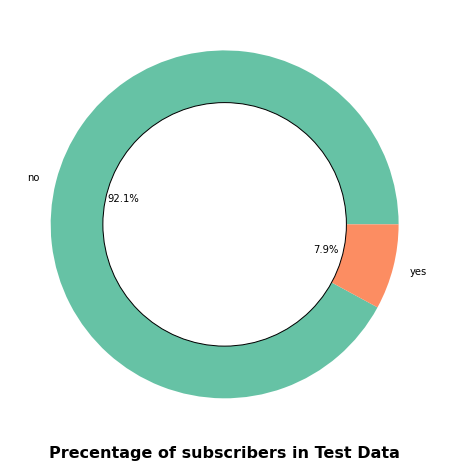

In [79]:
plt.figure(figsize=(10, 8))
submission['subscribed'].value_counts().plot.pie(autopct='%3.1f%%')
centre_circle = plt.Circle((0,0),0.7,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel("Precentage of subscribers in Test Data",fontsize=16,fontweight ='bold')
plt.ylabel('')

plt.show()


In [80]:
submission.to_csv('BankDeposit.csv', header=True, index=False)

In [81]:

import pickle
filename="BankDeposit.pkl"
pickle.dump(clf,open(filename,'wb'))

Analysis and Conclusions:
    
The mean and median of age is very close to each other. 

The standard deviation of balance, duration and pdays is greater than one third of the mean, distrubution would be spreaded out around the mean.

'Age' column is slightly right skewed. Most of the client age is between 25 to 65 years.

'Job' Here the number of clients who have 'blue-collar','management' and 'technician' and it is skewed towards right.

Married clients are more tend to subscribe for the term deposit.

Clients with higher education are more and also there are many clients with unkown ststus of education.

The distribution of age is fairly normal with smaller standard deviation. Subscribtion rate is also more in range of 30 to 40 years old.

Most of the clients do not default.

Most of the clients have housing loan

Clients who dont have housing loan are more likely to subscribe for the term deposite.

Most of the clients do not have loan and also the ratio of subscribers who took personal loan and did not take personal loan is almost same.

'Campaign outcome' is strongly coorelated with 'duration',
A moderate correlation between 'Campaign outcome' and 'previous contacts'.
Little correlations between 'balance', 'month of contact' and 'number of campaign'.

Important features are:

*Customer's account balance,
Customer's age,
Number of contacts performed during this campaign and contact duration,
Number of contacts performed before this campaign.*

->Customers of greater age are more likely to subscribe for the term deposit.
->Customers with greater account balance are more likely to subscribe for the term deposit.
->Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.

Now we hyper tuned Random forest and Decision Tree, as they both performed eqaully well in training.
By comparing both on various parameters, like:

*Classification Report
Confusion Matrix
Training and testing accuracy scores
Cross Value Score
Cross value Mean scores
Standard Deviation
ROC Score*

The final model we use is Random Forest.